# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2024

Мягий дедлайн: 23:59 11.12.2024

Жестокий дедлайн: 23:59 13.12.2024

### О задании

Задание состоит из трёх разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево для классификации и сравните его со стандартное имплементацией из sklearn.
3. В третьем разделе вы сделаете решающее дерево для регрессии, в листьях которого линейные модели.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 11 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест [ждем контеста] нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [251]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [252]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [253]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

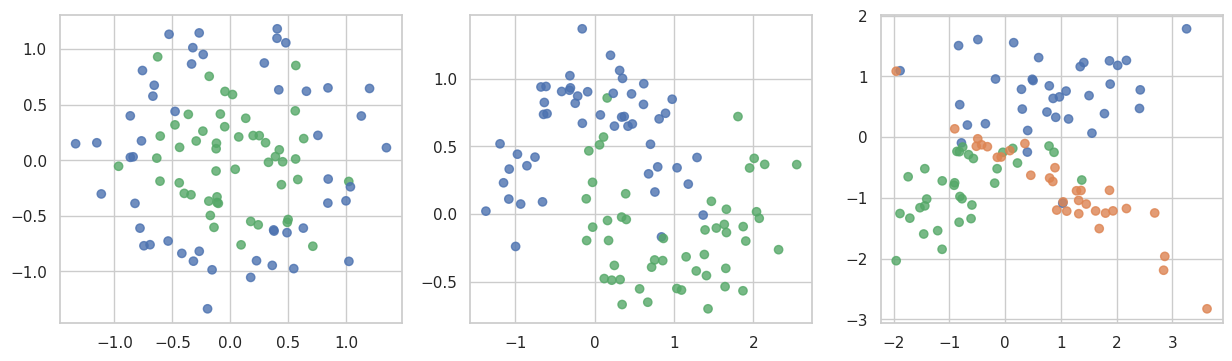

In [254]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [255]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

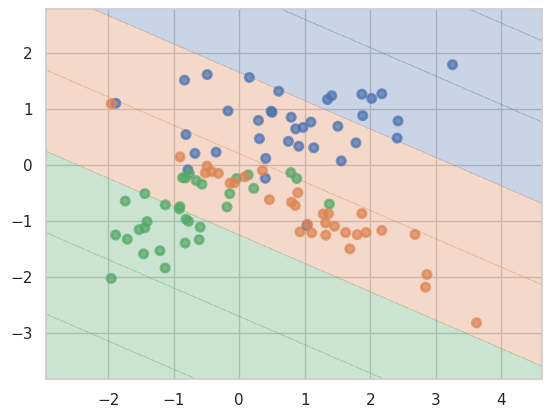

In [256]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Точность на обучающей выборке: 1.0
Точность на тестовой выборке: 0.8333333333333334



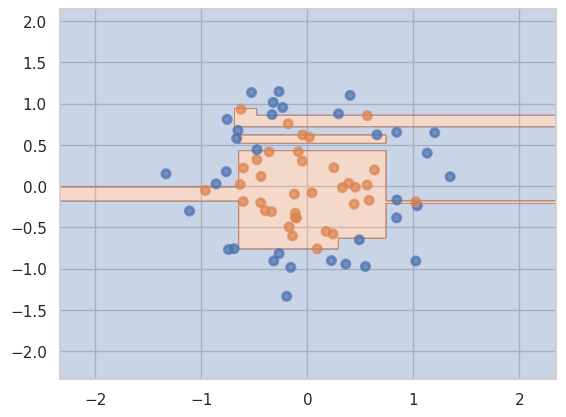

In [257]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

X, y = datasets[0]
x_train, x_test, y_train, y_test = train_test_split(
        X,
        y,
        train_size=0.7,
        random_state=777
    )
tree_cl  = DecisionTreeClassifier().fit(x_train, y_train)

y_train_pred = tree_cl.predict(x_train)
y_test_pred = tree_cl.predict(x_test)

plot_surface(tree_cl, x_train, y_train)
print('Точность на обучающей выборке:', accuracy_score(y_train, y_train_pred))
print('Точность на тестовой выборке:', accuracy_score(y_test, y_test_pred))
print()

Точность на обучающей выборке: 1.0
Точность на тестовой выборке: 0.8333333333333334



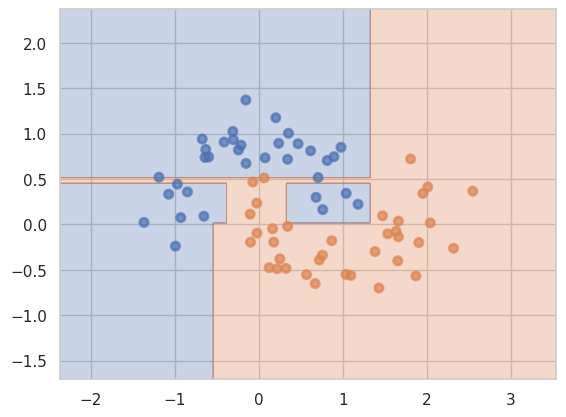

In [258]:
X, y = datasets[1]
x_train, x_test, y_train, y_test = train_test_split(
        X,
        y,
        train_size=0.7,
        random_state=555
    )
tree_cl  = DecisionTreeClassifier().fit(x_train, y_train)

y_train_pred = tree_cl.predict(x_train)
y_test_pred = tree_cl.predict(x_test)

plot_surface(tree_cl, x_train, y_train)
print('Точность на обучающей выборке:', accuracy_score(y_train, y_train_pred))
print('Точность на тестовой выборке:', accuracy_score(y_test, y_test_pred))
print()

Точность на обучающей выборке: 1.0
Точность на тестовой выборке: 0.6666666666666666



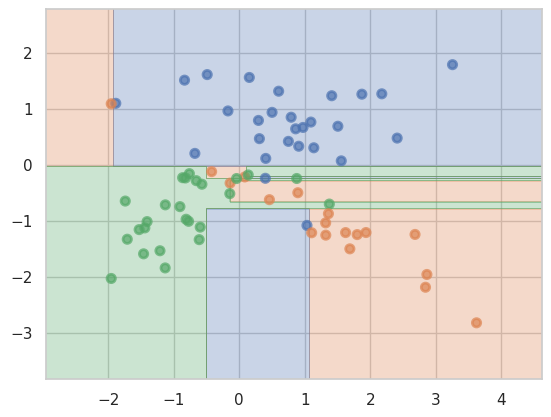

In [259]:
X, y = datasets[2]
x_train, x_test, y_train, y_test = train_test_split(
        X,
        y,
        train_size=0.7,
        random_state=555
    )
tree_cl  = DecisionTreeClassifier().fit(x_train, y_train)

y_train_pred = tree_cl.predict(x_train)
y_test_pred = tree_cl.predict(x_test)

plot_surface(tree_cl, x_train, y_train)
print('Точность на обучающей выборке:', accuracy_score(y_train, y_train_pred))
print('Точность на тестовой выборке:', accuracy_score(y_test, y_test_pred))
print()

__Ответ:__

> Модели сильно переобучены, так как точность на обучающихся данных составляет 100%, на тестовых данных точность модели снижается. Исходя из графиков, также можно утверждать,что модель переобучена,так как каждый из объектов верно определен к своему классу и ошибок не наблюдается.




__Задание 2. (1.25 баллов)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

__Бонус (0.75 баллов)__

Вместо того, чтобы рисовать  кучу графиков, сделайте интерактивную визуализацию разделяющей гиперплоскости с помощью библиотеки `plotly` (конкретнее, вам пригодится `plotly.graph_objects`): у вас должен получиться виджет с ползунком, по которому можно выбрать параметры `max_depth` и `min_samples_leaf` и посмотреть, как в зависимости от них меняется разделяющая поверхность и прогнозы модели. Если всё сделать аккуратно, получится очень красиво. Помните, что при загрузке в anytask виджеты могут много весить и надо подождать. Если ваш ноутбук не загружается -- попробуйте загрузить сначала с очищенным выводом этой ячейки.

Заранее предупреждаем, что бонус сложный. Полезно будет ознакомиться:
 - https://plotly.com/python/sliders/
 - https://plotly.com/python/dropdowns/
 - https://plotly.com/python/knn-classification/

Набор данных 0:
Точность на обучающей выборке: 0.8
Точность на тестовой выборке: 0.8333333333333334

Набор данных 1:
Точность на обучающей выборке: 0.8571428571428571
Точность на тестовой выборке: 0.8

Набор данных 2:
Точность на обучающей выборке: 0.8428571428571429
Точность на тестовой выборке: 0.9



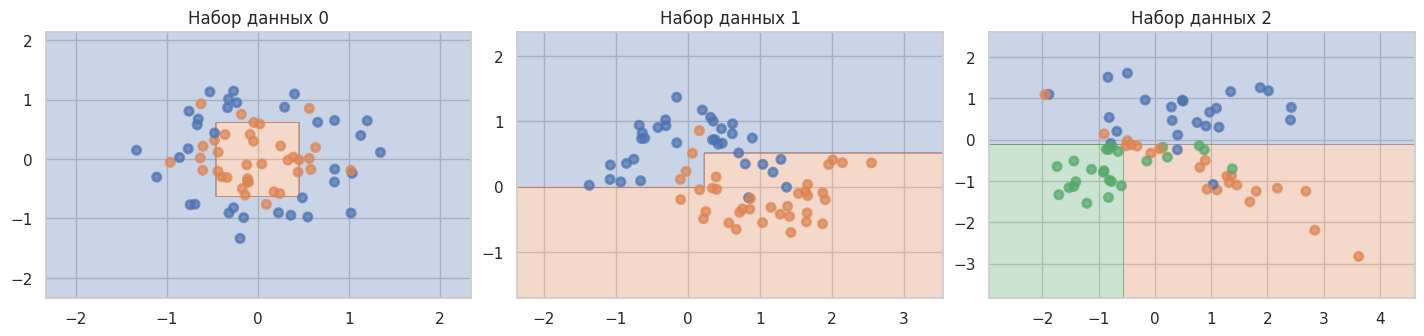

In [260]:
plt.figure(figsize=(15, 4))
for i, (X, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(
        X,
        y,
        train_size=0.7,
        random_state=777
    )
    tree_cl = DecisionTreeClassifier(
        max_depth=8,
        min_samples_leaf=10,
        random_state=777
    ).fit(x_train, y_train)

    y_train_pred = tree_cl.predict(x_train)
    y_test_pred = tree_cl.predict(x_test)

    plt.subplot(1, len(datasets), i + 1)
    plot_surface(tree_cl, x_train, y_train)
    plt.title(f'Набор данных {i}')

    print(f'Набор данных {i}:')
    print('Точность на обучающей выборке:', accuracy_score(y_train, y_train_pred))
    print('Точность на тестовой выборке:', accuracy_score(y_test, y_test_pred))
    print()

Набор данных 0:
Точность на обучающей выборке: 0.8
Точность на тестовой выборке: 0.8333333333333334

Набор данных 1:
Точность на обучающей выборке: 0.8571428571428571
Точность на тестовой выборке: 0.8

Набор данных 2:
Точность на обучающей выборке: 0.8428571428571429
Точность на тестовой выборке: 0.9



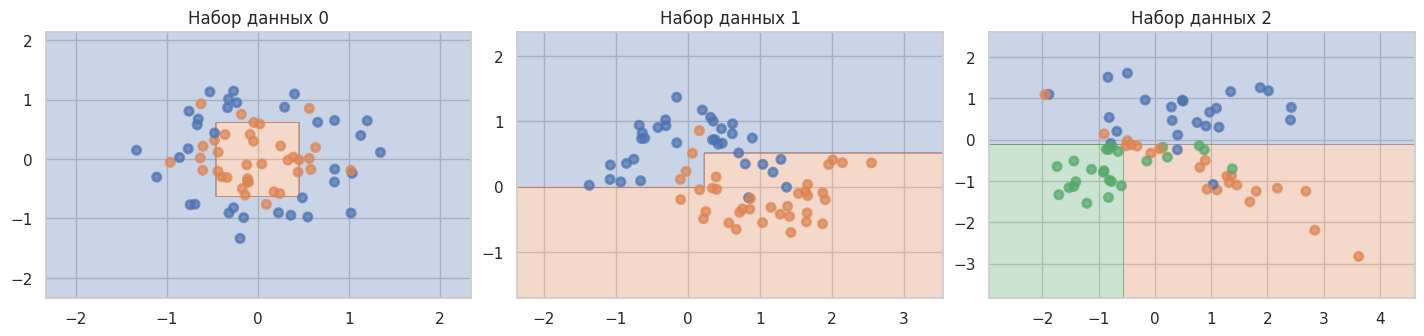

In [261]:
plt.figure(figsize=(15, 4))
for i, (X, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(
        X,
        y,
        train_size=0.7,
        random_state=777
    )
    tree_cl = DecisionTreeClassifier(
        max_depth=15,
        min_samples_leaf=10,
        random_state=777
    ).fit(x_train, y_train)

    y_train_pred = tree_cl.predict(x_train)
    y_test_pred = tree_cl.predict(x_test)

    plt.subplot(1, len(datasets), i + 1)
    plot_surface(tree_cl, x_train, y_train)
    plt.title(f'Набор данных {i}')

    print(f'Набор данных {i}:')
    print('Точность на обучающей выборке:', accuracy_score(y_train, y_train_pred))
    print('Точность на тестовой выборке:', accuracy_score(y_test, y_test_pred))
    print()

Набор данных 0:
Точность на обучающей выборке: 0.9
Точность на тестовой выборке: 0.8333333333333334

Набор данных 1:
Точность на обучающей выборке: 0.9142857142857143
Точность на тестовой выборке: 0.8666666666666667

Набор данных 2:
Точность на обучающей выборке: 0.8857142857142857
Точность на тестовой выборке: 0.8333333333333334



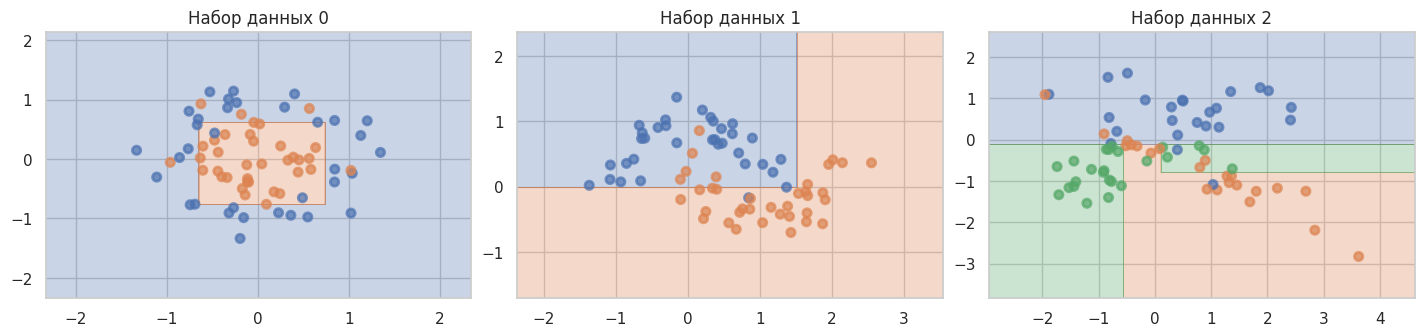

In [262]:
plt.figure(figsize=(15, 4))
for i, (X, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(
        X,
        y,
        train_size=0.7,
        random_state=777
    )
    tree_cl = DecisionTreeClassifier(
        max_depth=8,
        min_samples_leaf=5,
        random_state=777
    ).fit(x_train, y_train)

    y_train_pred = tree_cl.predict(x_train)
    y_test_pred = tree_cl.predict(x_test)

    plt.subplot(1, len(datasets), i + 1)
    plot_surface(tree_cl, x_train, y_train)
    plt.title(f'Набор данных {i}')

    print(f'Набор данных {i}:')
    print('Точность на обучающей выборке:', accuracy_score(y_train, y_train_pred))
    print('Точность на тестовой выборке:', accuracy_score(y_test, y_test_pred))
    print()

__Ответ:__

1.   max_depth=8,  
min_samples_leaf=10 -

Набор данных 0:
Точность на обучающей выборке: 0.8
Точность на тестовой выборке: 0.8333333333333334

Набор данных 1:
Точность на обучающей выборке: 0.8571428571428571
Точность на тестовой выборке: 0.8

Набор данных 2:
Точность на обучающей выборке: 0.8428571428571429
Точность на тестовой выборке: 0.9

2.   max_depth=15,  
min_samples_leaf=10 -

Набор данных 0:
Точность на обучающей выборке: 0.8
Точность на тестовой выборке: 0.8333333333333334

Набор данных 1:
Точность на обучающей выборке: 0.8571428571428571
Точность на тестовой выборке: 0.8

Набор данных 2:
Точность на обучающей выборке: 0.8428571428571429
Точность на тестовой выборке: 0.9

*   **Вывод** : глубина и минимальное количество листьев позволяет снизить переобучение на обучающей выборке, но ухудшить качество на тестовой. При повторном увеличение параметра глубины качество моделей не меняется.  


3.   max_depth=8,  
min_samples_leaf=5 -

Набор данных 0:
Точность на обучающей выборке: 0.9
Точность на тестовой выборке: 0.8333333333333334

Набор данных 1:
Точность на обучающей выборке: 0.9142857142857143
Точность на тестовой выборке: 0.8666666666666667

Набор данных 2:
Точность на обучающей выборке: 0.8857142857142857
Точность на тестовой выборке: 0.8333333333333334


*   **Вывод** При повторном увеличение параметра минимального количества листьев  качество моделей на тестовых данных снижается, а на тестовых, наоборот, возрастает.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

In [263]:
import numpy as np
def find_best_split(feature_vector, target_vector):
    indices_sorted = np.argsort(feature_vector)
    features_sorted = feature_vector[indices_sorted]
    targets_sorted = target_vector[indices_sorted]

    unique_mask = features_sorted[1:] != features_sorted[:-1]
    midpoints = (features_sorted[1:] + features_sorted[:-1]) / 2
    threshold_vec = midpoints[unique_mask]

    R = np.size(targets_sorted)
    left_count = np.arange(1, R)

    cumulative_sum = np.cumsum(targets_sorted)
    left_mean_pos = cumulative_sum[:-1] / left_count
    left_mean_neg = 1 - left_mean_pos

    right_count = cumulative_sum[-1] - cumulative_sum[:-1]
    right_mean_pos = right_count / (R - left_count)
    right_mean_neg = 1 - right_mean_pos

    gini_vec = (left_count / R * (left_mean_neg ** 2 + left_mean_pos ** 2 - 1) +
                    (R - left_count) / R * (right_mean_neg ** 2 + right_mean_pos ** 2 - 1))

    gini_vec = gini_vec[unique_mask]
    best_index = np.argmax(gini_vec)

    threshold_best = threshold_vec[best_index]
    gini_best = gini_vec[best_index]

    return threshold_vec, gini_vec, threshold_best, gini_best

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [265]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import pandas as pd
df = pd.read_csv('/content/students.csv')

In [266]:
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [268]:
y = df['UNS']
x = df.drop(columns = 'UNS')

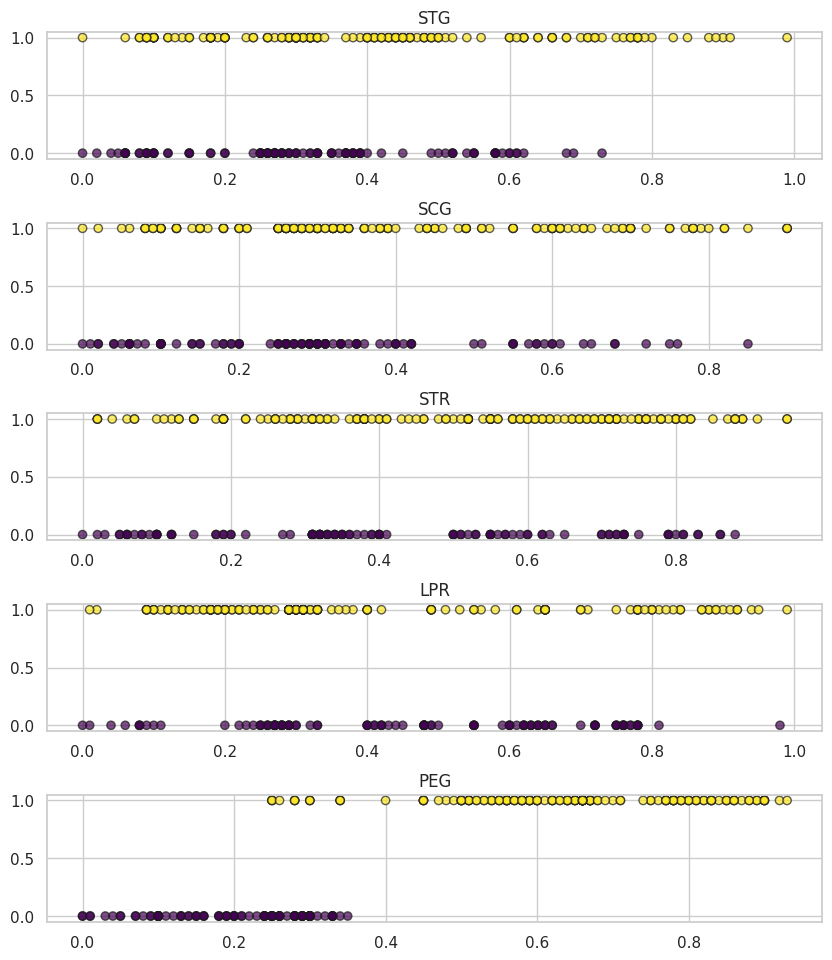

In [269]:
plt.figure(figsize=(10, 10))
plt.subplots_adjust(top=1, hspace=0.5)
for i, column_name in enumerate(x.columns):
    plt.subplot(5, 1, i + 1)
    plt.scatter(x[column_name], y, c=y, cmap='viridis', alpha=0.7, edgecolors='k')
    plt.title(column_name)

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**
Деление выборки можно производить при помощи признака "PEG".Исходя из scatter-графиков, можно сделать вывод,что порог в "PEG" равен 0,4. На остальных графиках порог определить сложно.
Кривая для "хороших" признаков имеет определенную точку, по которой можно разделить объекты на несколько классов, у остальных кривых порог разделения сложно определить.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

In [270]:
from collections import Counter

class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=None,
                 min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical",
                           feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def get_params(self, deep=False):
        return {'feature_types': self._feature_types,
               'max_depth': self._max_depth,
               'min_samples_split': self._min_samples_split,
               'min_samples_leaf': self._min_samples_leaf}

    def _fit_node(self, sub_X, sub_y, node):
      #проверяет, все ли метки в sub_y одинаковые
        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        #начинаем итерацию с 0, а не с 1
        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_click / current_count
                #будем сортировать только ключи словаря
                sorted_categories = sorted(ratio.keys(),key=lambda k: ratio[k])
                categories_map = dict(zip(sorted_categories,range(len(sorted_categories))))
                #итератор для создания категориальных признаков
                feature_vector = np.array([categories_map[x] for x in sub_X[:, feature]])
            else:
                raise ValueError

            if np.all(feature_vector == feature_vector[0]):
                continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical":
                    threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, categories_map.items())))
                else:
                    raise ValueError

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError
        node["left_child"], node["right_child"] = {}, {}
        self.depth += 1
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(sub_X[np.logical_not(split)],sub_y[np.logical_not(split)], node["right_child"])

    def _predict_node(self, x, node):
      if node['type'] == 'terminal':
        return node['class']
      feature_type = self._feature_types[node['feature_split']]
      feature_value = x[node['feature_split']]

      if feature_type == 'real':
        next_node = node['left_child'] if feature_value < node['threshold'] else node['right_child']
      else:
        next_node = node['left_child'] if feature_value in node['categories_split'] else node['right_child']
        return self._predict_node(x, next_node)

    def fit(self, X, y):
        self.depth = 1
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)

In [271]:
# добавляем вызов max_depth=None, min_samples_split=None, min_samples_leaf=None
class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=None,
                 min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical",
                           feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf
        self.depth = 1

    def get_params(self, deep=False):
        return {'feature_types': self._feature_types,
               'max_depth': self._max_depth,
               'min_samples_split': self._min_samples_split,
               'min_samples_leaf': self._min_samples_leaf}

    def _fit_node(self, sub_X, sub_y, node, depth=1):
        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        if self._max_depth is not None and depth > self._max_depth:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        if self._min_samples_split is not None and len(sub_y) < self._min_samples_split:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_click / current_count
                sorted_categories = sorted(ratio.keys(), key=lambda k: ratio[k])
                categories_map = dict(zip(sorted_categories, range(len(sorted_categories))))
                feature_vector = np.array([categories_map[x] for x in sub_X[:, feature]])
            else:
                raise ValueError

            if np.all(feature_vector == feature_vector[0]):
                continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical":
                    threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, categories_map.items())))
                else:
                    raise ValueError

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        if self._min_samples_leaf is not None and (len(sub_y[split]) < self._min_samples_leaf or len(sub_y[np.logical_not(split)]) < self._min_samples_leaf):
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError
        node["left_child"], node["right_child"] = {}, {}
        self.depth += 1
        self._fit_node(sub_X[split], sub_y[split], node["left_child"], depth + 1)
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"], depth + 1)

    def _predict_node(self, x, node):
        if node['type'] == 'terminal':
            return node['class']
        feature_type = self._feature_types[node['feature_split']]
        feature_value = x[node['feature_split']]

        if feature_type == 'real':
            next_node = node['left_child'] if feature_value < node['threshold'] else node['right_child']
        else:
            next_node = node['left_child'] if feature_value in node['categories_split'] else node['right_child']
        return self._predict_node(x, next_node)

    def fit(self, X, y):
        self.depth = 1
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [272]:
df2 = pd.read_csv('/content/agaricus-lepiota.data')

In [273]:
df2

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [274]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in df2.columns:
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col])
    label_encoders[col] = le

df2.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1


In [275]:
y = df2['p']
x = df2.drop(columns='p')

In [276]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values,test_size=0.5, random_state=127)

In [277]:
feature = ['categorical' for x in x_train]

In [278]:
from sklearn.metrics import accuracy_score

tree = DecisionTree(feature_types=feature)
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy test: {accuracy:.4f}")
y_pred = tree.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy train: {accuracy:.4f}")
print('Depth:', tree.depth)

Accuracy test: 0.9998
Accuracy train: 1.0000
Depth: 9


__Задание 8. (1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe.

In [279]:
df3 = pd.read_csv('/content/tic-tac-toe-endgame.csv')

In [280]:
df3

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,negative
954,o,x,o,x,x,o,x,o,x,negative
955,o,x,o,x,o,x,x,o,x,negative
956,o,x,o,o,x,x,x,o,x,negative


In [281]:
label_encoders = {}
for col in df3.columns:
    le = LabelEncoder()
    df3[col] = le.fit_transform(df3[col])
    label_encoders[col] = le

df3.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,2,2,2,2,1,1,2,1,1,1
1,2,2,2,2,1,1,1,2,1,1
2,2,2,2,2,1,1,1,1,2,1
3,2,2,2,2,1,1,1,0,0,1
4,2,2,2,2,1,1,0,1,0,1


In [282]:
y = df3['V10']
x = df3.drop(columns='V10')

In [283]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values,test_size=0.3, random_state=127)

In [284]:
feature = ['categorical' for x in x_train]

In [286]:
tree = DecisionTree(feature_types=feature
                       )
tree.fit(x_train, y_train)

y_train_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)
print('Точность на обучающей выборке:', accuracy_score(y_train, y_train_pred))
print('Точность на тестовой выборке:', accuracy_score(y_test, y_test_pred))
print('Depth:', tree.depth)
print('Минимальное количество образцов для разбиения (min_samples_split):', tree._min_samples_split)
print('Минимальное количество образцов в листе (min_samples_leaf):', tree._min_samples_leaf)

Точность на обучающей выборке: 1.0
Точность на тестовой выборке: 0.9444444444444444
Depth: 49
Минимальное количество образцов для разбиения (min_samples_split): None
Минимальное количество образцов в листе (min_samples_leaf): None


Минимальное количество образцов для разделения: 2
Точность на обучающей выборке: 1.000
Точность на тестовой выборке: 0.944

Минимальное количество образцов для разделения: 12
Точность на обучающей выборке: 0.966
Точность на тестовой выборке: 0.920

Минимальное количество образцов для разделения: 22
Точность на обучающей выборке: 0.951
Точность на тестовой выборке: 0.892

Минимальное количество образцов для разделения: 32
Точность на обучающей выборке: 0.936
Точность на тестовой выборке: 0.910

Минимальное количество образцов для разделения: 42
Точность на обучающей выборке: 0.910
Точность на тестовой выборке: 0.882

Минимальное количество образцов для разделения: 52
Точность на обучающей выборке: 0.833
Точность на тестовой выборке: 0.795

Минимальное количество образцов для разделения: 62
Точность на обучающей выборке: 0.801
Точность на тестовой выборке: 0.743

Минимальное количество образцов для разделения: 72
Точность на обучающей выборке: 0.790
Точность на тестовой выборке: 0.760

М

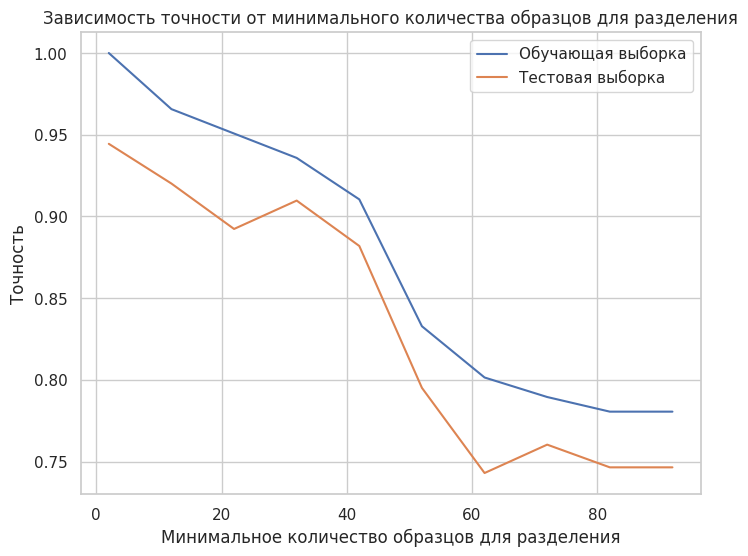

In [287]:
min_samples_splits = np.arange(2, 101, 10)
min_samples_split_train_acc = np.zeros(len(min_samples_splits))
min_samples_split_test_acc = np.zeros(len(min_samples_splits))

for i, min_samples_split in enumerate(min_samples_splits):
    tree = DecisionTree(feature_types=feature,
                       max_depth=10,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=1)
    tree.fit(x_train, y_train)
    y_train_pred = tree.predict(x_train)
    y_test_pred = tree.predict(x_test)
    min_samples_split_train_acc[i] = accuracy_score(y_train, y_train_pred)
    min_samples_split_test_acc[i] = accuracy_score(y_test, y_test_pred)
    print(f"Минимальное количество образцов для разделения: {min_samples_split}")
    print(f"Точность на обучающей выборке: {min_samples_split_train_acc[i]:.3f}")
    print(f"Точность на тестовой выборке: {min_samples_split_test_acc[i]:.3f}")
    print()

plt.figure(figsize=(8, 6))
plt.plot(min_samples_splits, min_samples_split_train_acc, label='Обучающая выборка')
plt.plot(min_samples_splits, min_samples_split_test_acc, label='Тестовая выборка')
plt.xlabel('Минимальное количество образцов для разделения')
plt.ylabel('Точность')
plt.title('Зависимость точности от минимального количества образцов для разделения')
plt.legend()
plt.show()

**С увеличением минимального количества образцов для разделения точность на обучающей и тестовой выборках падает.После 82-ого деления качество модели не меняется.**

Минимальное количество образцов в листе: 1
Точность на обучающей выборке: 1.000
Точность на тестовой выборке: 0.944

Минимальное количество образцов в листе: 11
Точность на обучающей выборке: 0.936
Точность на тестовой выборке: 0.910

Минимальное количество образцов в листе: 21
Точность на обучающей выборке: 0.896
Точность на тестовой выборке: 0.889

Минимальное количество образцов в листе: 31
Точность на обучающей выборке: 0.790
Точность на тестовой выборке: 0.760

Минимальное количество образцов в листе: 41
Точность на обучающей выборке: 0.781
Точность на тестовой выборке: 0.747

Минимальное количество образцов в листе: 51
Точность на обучающей выборке: 0.731
Точность на тестовой выборке: 0.712

Минимальное количество образцов в листе: 61
Точность на обучающей выборке: 0.718
Точность на тестовой выборке: 0.677

Минимальное количество образцов в листе: 71
Точность на обучающей выборке: 0.718
Точность на тестовой выборке: 0.677

Минимальное количество образцов в листе: 81
Точность на о

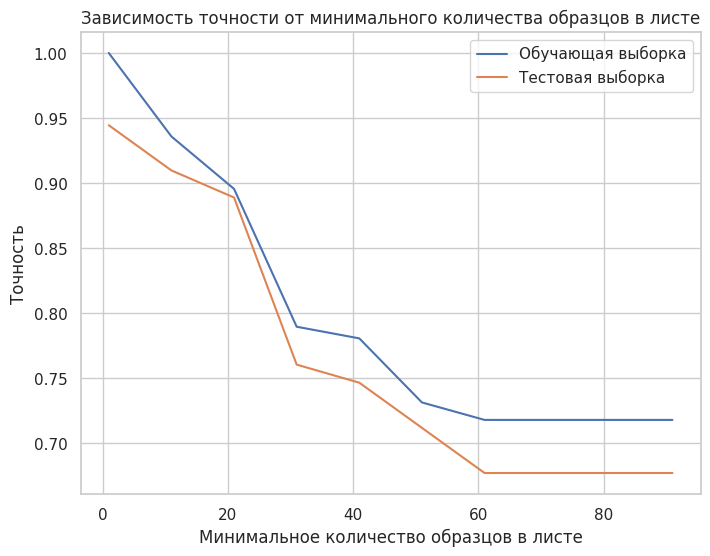

In [289]:
min_samples_leaves = np.arange(1, 101, 10)
min_samples_leaf_train_acc = np.zeros(len(min_samples_leaves))
min_samples_leaf_test_acc = np.zeros(len(min_samples_leaves))

for i, min_samples_leaf in enumerate(min_samples_leaves):
    tree = DecisionTree(feature_types=feature,
                       max_depth=10,
                       min_samples_split=2,
                       min_samples_leaf=min_samples_leaf)
    tree.fit(x_train, y_train)
    y_train_pred = tree.predict(x_train)
    y_test_pred = tree.predict(x_test)
    min_samples_leaf_train_acc[i] = accuracy_score(y_train, y_train_pred)
    min_samples_leaf_test_acc[i] = accuracy_score(y_test, y_test_pred)
    print(f"Минимальное количество образцов в листе: {min_samples_leaf}")
    print(f"Точность на обучающей выборке: {min_samples_leaf_train_acc[i]:.3f}")
    print(f"Точность на тестовой выборке: {min_samples_leaf_test_acc[i]:.3f}")
    print()

plt.figure(figsize=(8, 6))
plt.plot(min_samples_leaves, min_samples_leaf_train_acc, label='Обучающая выборка')
plt.plot(min_samples_leaves, min_samples_leaf_test_acc, label='Тестовая выборка')
plt.xlabel('Минимальное количество образцов в листе')
plt.ylabel('Точность')
plt.title('Зависимость точности от минимального количества образцов в листе')
plt.legend()

**С увеличением минимального количества образцов в листе  точность на обучающей и тестовой выборках падает,но остается хорошим.**

__Задание 9. (до 3-х баллов)__

Реализуйте класс `LinearRegressionTree`:

 - Если вам удобно, можете сделать его наследуемым от `DecisionTree` и переопределить только необходимые методы. Можете добавить новые — как вам нравится.
 - В листьях находятся не константные предсказания, а линейные модели (можно использовать из библиотеки `sklearn`).
 - Ваша реализация должна решать задачу __регрессии__, поэтому для поиска оптимального разбиения нужно написать новую функцию.
 - **Максимум 1.8 балла, если**:
   - В качестве критерия для разбиения считаете среднее квадратное/абсолютное отклонение
   - Итерируетесь по всем порогам
   - Ваша реализация строится как обычное решающее дерево для регрессии, но в листьях линейные модели.
   - Есть поддержка параметра max_depth
 - **Максимум три балла, если выполнено следующее**:
     - Для разбиения перебираются не все пороги. Пороги выбираются из значений признаков, разбитых на квантили.
     - Для разбиении выбирается порог, который минимизирует суммарную ошибку линейных моделей после разбиения: $$\text{loss} = \frac{n_{left}}{n} \cdot \text{loss}_{left} + \frac{n_{right}}{n} \cdot \text{loss}_{right}$$ (Разумеется, для оценки этих ошибок вам надо будет строить много линейных моделей, это не дисперсии. В качестве функционала ошибки возьмите MAE или MSE)
     - Есть поддержка параметров max_depth, min_samples_split, min_samples_leaf

In [290]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

class LinearRegressionTree(DecisionTree):
    def __init__(self, feature_types, max_depth=None, min_samples_split=None,
                 min_samples_leaf=None):
        super().__init__(feature_types, max_depth, min_samples_split,
                         min_samples_leaf)

    def _fit_node(self, sub_X, sub_y, node, depth=1):
        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["model"] = LinearRegression()
            node["model"].fit(sub_X, sub_y)
            return

        if self._max_depth is not None and depth > self._max_depth:
            node["type"] = "terminal"
            node["model"] = LinearRegression()
            node["model"].fit(sub_X, sub_y)
            return

        if self._min_samples_split is not None and len(sub_y) < self._min_samples_split:
            node["type"] = "terminal"
            node["model"] = LinearRegression()
            node["model"].fit(sub_X, sub_y)
            return

        feature_best, threshold_best, loss_best = None, None, np.inf
        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            if feature_type == "real":
                feature_vector = sub_X[:, feature]
                quantiles = np.quantile(feature_vector, np.linspace(0, 1, 10))
                for threshold in quantiles:
                    split = feature_vector < threshold
                    left_X, left_y = sub_X[split], sub_y[split]
                    right_X, right_y = sub_X[~split], sub_y[~split]
                    if len(left_y) < self._min_samples_leaf or len(right_y) < self._min_samples_leaf:
                        continue
                    left_model = LinearRegression()
                    right_model = LinearRegression()
                    left_model.fit(left_X, left_y)
                    right_model.fit(right_X, right_y)
                    left_pred = left_model.predict(left_X)
                    right_pred = right_model.predict(right_X)
                    loss = (len(left_y) / len(sub_y)) * mean_squared_error(left_y, left_pred) + \
                           (len(right_y) / len(sub_y)) * mean_squared_error(right_y, right_pred)
                    if loss < loss_best:
                        feature_best = feature
                        threshold_best = threshold
                        loss_best = loss

        if feature_best is None:
            node["type"] = "terminal"
            node["model"] = LinearRegression()
            node["model"].fit(sub_X, sub_y)
            return

        node["type"] = "nonterminal"
        node["feature_split"] = feature_best
        node["threshold"] = threshold_best
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[sub_X[:, feature_best] < threshold_best], sub_y[sub_X[:, feature_best] < threshold_best],
                       node["left_child"], depth + 1)
        self._fit_node(sub_X[sub_X[:, feature_best] >= threshold_best], sub_y[sub_X[:, feature_best] >= threshold_best],
                       node["right_child"], depth + 1)

    def _predict_node(self, x, node):
        if node['type'] == 'terminal':
            return node['model'].predict(x.reshape(1, -1))[0]
        feature_type = self._feature_types[node['feature_split']]
        feature_value = x[node['feature_split']]
        if feature_value < node['threshold']:
            return self._predict_node(x, node['left_child'])
        else:
            return self._predict_node(x, node['right_child'])

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)

__Задание 10. (1 балл)__

Проведите эксперименты с реализованным вами линейным деревом на любом подходящем датасете из sklearn (https://scikit-learn.org/1.5/datasets/real_world.html), который вам нравится. Подберите лучшие гиперпараметры (max_depth и остальные, если вы их реализовывали). Сравните ваше дерево со стандартным деревом для регрессии из sklearn, для него тоже подберите гиперпараметры.

In [291]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [292]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df4 = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df4['target'] = housing.target
df4.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [293]:
y = df4['target']
x = df4.drop(columns='target')

In [294]:
y.describe()

,target
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


In [295]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [296]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values,test_size=0.3, random_state=127)

In [303]:
from sklearn.tree import DecisionTreeRegressor

lrt = LinearRegressionTree(feature_types=['real'] * x_train.shape[1], max_depth=30, min_samples_split=40, min_samples_leaf=5)
lrt.fit(x_train, y_train)
y_pred_lrt = lrt.predict(x_test)

dtr = DecisionTreeRegressor(max_depth=30, min_samples_split=40, min_samples_leaf=5)
dtr.fit(x_train, y_train)
y_pred_dtr = dtr.predict(x_test)

print(f"LinearRegressionTree - MSE: {mean_squared_error(y_test, y_pred_lrt)}")
print(f"LinearRegressionTree - MAE: {mean_absolute_error(y_test, y_pred_lrt)}")

print(f"DecisionTreeRegressor - MSE: {mean_squared_error(y_test, y_pred_dtr)}")
print(f"DecisionTreeRegressor - MAE: {mean_absolute_error(y_test, y_pred_dtr)}")

LinearRegressionTree - MSE: 3.3919890481392416
LinearRegressionTree - MAE: 0.5432476655040052
DecisionTreeRegressor - MSE: 0.3581885621917636
DecisionTreeRegressor - MAE: 0.3954118567293544


**MSE в lin reg показывает слишком большую ошибку. MAE показывает в Lin Reg ошибку больше,чем в DecisionTree. Модель DecisionTreeRegressor работает лучше.**

In [301]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

param_grid_dtr = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [5, 10, 15, 20],
    'min_samples_leaf': [5, 10, 15, 20]
}
grid_search_dtr = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_dtr, cv=5, scoring='neg_mean_squared_error')
grid_search_dtr.fit(x_train, y_train)
print(f"DecisionTreeRegressor: Наилучшие гиперпараметры - {grid_search_dtr.best_params_}, оценка - {grid_search_dtr.best_score_}")
dtr_best = DecisionTreeRegressor(**grid_search_dtr.best_params_)
dtr_best.fit(x_train, y_train)
y_pred_dtr_best = dtr_best.predict(x_test)
print(f"DecisionTreeRegressor (наилучшие гиперпараметры): MSE - {mean_squared_error(y_test, y_pred_dtr_best)}, MAE - {mean_absolute_error(y_test, y_pred_dtr_best)}")

DecisionTreeRegressor: Наилучшие гиперпараметры - {'max_depth': 15, 'min_samples_leaf': 15, 'min_samples_split': 5}, оценка - -0.36956840573304783
DecisionTreeRegressor (наилучшие гиперпараметры): MSE - 0.37099947196795274, MAE - 0.4023218081479752


Посмотрите, что будет, если обучить ваше дерево на данных, которые сгенерированы внизу. Нарисуйте график с предсказаниями и таргетами на всей выборке, сравните с обычным деревом.

Напишите, какие достоинства и недостатки вы видите у реализованного вами линейного дерева.

In [306]:
n_samples = 3_000
x = np.linspace(0, 5, n_samples).reshape(-1, 1)
y = np.sin(x.flatten()) + np.random.normal(0, 0.1, n_samples) * np.random.normal(0, 1, n_samples)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.95, random_state=0x4b524f4c2d562d53544f594c4f % (2 ** 32 - 1))

lrt = LinearRegressionTree(feature_types=['real'] * x_train.shape[1], max_depth=60, min_samples_split=60, min_samples_leaf=20)
lrt.fit(x_train, y_train)
y_pred_lrt = lrt.predict(x_test)

dtr = DecisionTreeRegressor(max_depth=60, min_samples_split=60, min_samples_leaf=20)
dtr.fit(x_train, y_train)
y_pred_dtr = dtr.predict(x_test)

print(f"LinearRegressionTree - MSE: {mean_squared_error(y_test, y_pred_lrt)}")
print(f"LinearRegressionTree - MAE: {mean_absolute_error(y_test, y_pred_lrt)}")
print(f"DecisionTreeRegressor - MSE: {mean_squared_error(y_test, y_pred_dtr)}")
print(f"DecisionTreeRegressor - MAE: {mean_absolute_error(y_test, y_pred_dtr)}")

LinearRegressionTree - MSE: 0.014312938679235823
LinearRegressionTree - MAE: 0.08533189323553864
DecisionTreeRegressor - MSE: 0.0666622891613444
DecisionTreeRegressor - MAE: 0.20173849554364687


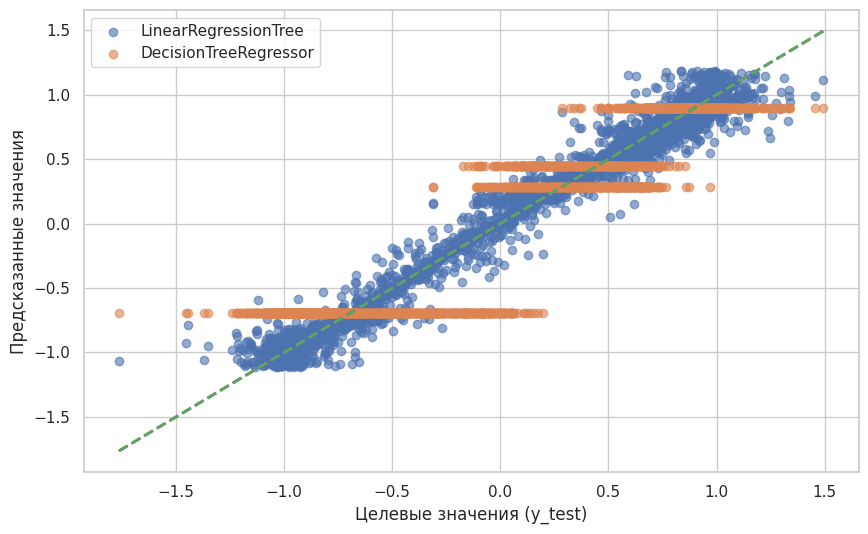

In [310]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lrt, label='LinearRegressionTree', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.scatter(y_test, y_pred_dtr, label='DecisionTreeRegressor', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'g--', lw=2)
plt.xlabel('Целевые значения (y_test)')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.show()

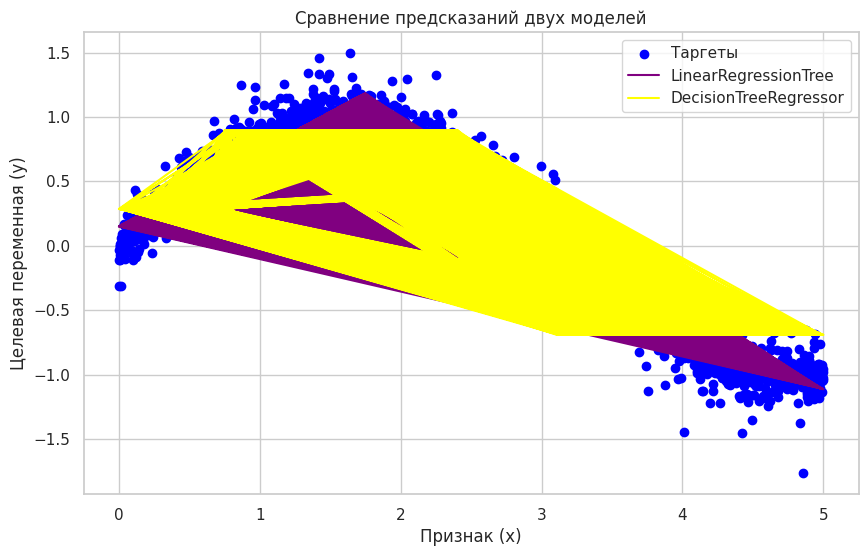

In [308]:
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, label='Таргеты', color='blue')
plt.plot(x_test, y_pred_lrt, label='LinearRegressionTree', color='purple')
plt.plot(x_test, y_pred_dtr, label='DecisionTreeRegressor', color='yellow')
plt.xlabel('Признак (x)')
plt.ylabel('Целевая переменная (y)')
plt.legend()
plt.title('Сравнение предсказаний двух моделей')
plt.show()

**Lin Reg лучше предсказывает значения, чем Дерево решений. Ошибки у LinReg минимальны, модель работает практически идеально.Работа и предсказания моделей зависят от данных и от настройки гиперпараметров. На двух разных датасетах в одном случае лучше себя показала LinReg, в другом случае Дерево решений.**

Вставьте что угодно, описывающее ваши впечатления от этого задания: